**SQL: Structured Query Language**

In [ ]:
SQL is designed to work with relational data. This really just means pieces of data that are related to each other.

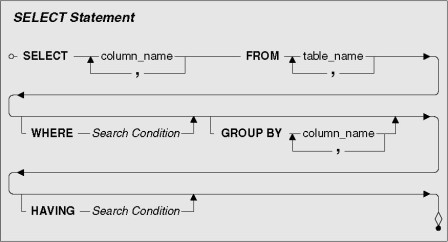

SELECT: The columns you want
---options: DISTINCT, using AS to rename columns, single number aggregates

FROM: the source tables
---options: also uses aliasing with AS; joining with [LEFT|INNER|RIGHT|FULL] 

JOIN ___ [ON|USING]

WHERE: your filters

options: comparators like = & >=; BETWEEN, IN, LIKE (with wildcards %); booleans like AND, OR, NOT
ORDER BY: sorting

options: ASC (default) and DESC
LIMIT: # of rows to return (pair with OFFSET)

Connecting to a database:
Connect to our database by importing sqlite3 and running the following cell in our notebook. You'll need a cursor object (cur) to fetch results. Cursor objects allow you to keep track of which result set is which since it's possible to run multiple queries before you're done fetching the results of the first.

import sqlite3
conn = sqlite3.connect('data.sqlite')
cur = conn.cursor()

For strings, use """str""": triple quotes have the added functionality of being able to use multiple lines within the same string


asterix: This indicates that this is the primary key for the table. A primary key is a unique identifier for a table. That is, there can only be unique values for this column entry. 

The columns that are the primary key for one table can also appear on other tables. This is known as a foreign key aka the primary key from a different ("foreign") table.

Wrapping results into dataframes:
    
import pandas as pd
cur.execute("""SELECT * FROM employees LIMIT 5;""")
df = pd.DataFrame(cur.fetchall())
##To get column names
df.columns = [x[0] for x in cur.description]
df.head()

*Alternate to .fetchall* --> When you would only like the first result (or one result as is the case in the example above) you can use the sqlite3 method .fetchone()

In [ ]:
Where condition: the WHERE clause filters query results by some condition
    
    Example: cur.execute("""SELECT * FROM customers WHERE city = 'Boston' OR city = 'Madrid';""")

Order by and limit clauses:

Two additional keywords that you can use to refine your searches are the ORDER BY and LIMIT clauses. 
    -The order by clause allows you to sort the results by a particular feature. 
        -For example, you could sort by the customerName column if you wished to get results in alphabetical order. 
        -By default, ORDER BY is ascending. 
        -If you want the opposite, use the additional parameter DESC. 
        
    -Finally, the limit clause is typically the last argument in a SQL query and simply limits the output to a set number of results.

In [ ]:
Between clause:
    
Ex: SELECT column_name(s) FROM table_name WHERE column_name BETWEEN value1 AND value2;

In [ ]:
To find null:
    
Ex: SELECT * FROM cats WHERE Name IS null;

COUNT (SQL aggregate function)

For now, we'll just focus on COUNT, which counts the number of records that meet a certain condition. Here's a standard SQL query using COUNT:

SELECT COUNT([column name]) FROM [table name] WHERE [column name] = [value]
Let's try it out and count the number of cats who have an owner_id of 1:

SELECT COUNT(owner_id) FROM cats WHERE owner_id = 1;

**GROUP BY**

Like its name suggests, it groups your results by a given column. The GROUP BY clause groups records into summary rows and returns one record for each group. 

Ex: SELECT breed, COUNT(breed) FROM cats GROUP BY breed;
    
Typically, GROUP BY also involves an aggregate function (COUNT, AVG, etc.). Lastly, GROUP BY can group by one or more columns.    

SQLite allows us to explicitly state the tableName.columnName you want to select. This is particularly useful when you want data from two different tables.

**ALIASING**

An Alias is a shorthand for a table or column name. Aliases reduce the amount of typing required to enter a query. Generally, complex queries with aliases are easier to read. Aliases are useful with JOIN, GROUP BY, and aggregates (SUM, COUNT, etc.). An Alias only exists for the duration of the query.

You can alias your GROUP BY by specifying the index of our selection order that we want to group by. This is simply written as GROUP BY 1, with the number "1" referring to the first column name that we are selecting.

Additionally, we can also rename our aggregate to a more descriptive name using the AS clause.

**Other Aggregations**
Aside from COUNT() some other useful aggregations include:

MIN()
MAX()
SUM()
AVG()

**HAVING CLAUSE**

Finally, we can also filter our aggregated views with the HAVING clause. The HAVING clause works similarly to the WHERE clause, except it is used to filter data selections on conditions after the GROUP BY clause. For example, if we wanted to filter based on a customer's last name, we would use the WHERE clause. However, if we wanted to filter a list of cities with at least 5 customers, we would use the HAVING clause. First, we would GROUP BY city and then use the HAVING clause, which will allow us to pass conditions on the result of this aggregation.

We can also use the WHERE and HAVING clauses in conjunction with each other for more complex rules. For example, let's say we want a list of customers who have made at least 2 purchases of over 50K each.

cur.execute("""SELECT customerName,
               COUNT(amount) AS number_purchases_over_50K
               FROM customers
               JOIN payments
               USING(customerNumber)
               WHERE amount >= 50000
               GROUP BY customerName
               HAVING count(amount) >= 2
               ORDER BY count(amount) DESC;""")
df = pd.DataFrame(cur.fetchall())
df. columns = [i[0] for i in cur.description]
print(len(df))
df.head()

**USING clause**

more concise way to join the tables, if the column name is identical, is the USING clause. Rather then saying on tableA.column = tableB.column we can simply say using(column). Again, this only works if the column is identically named for both tables.

In [ ]:
PRAGMA: 
Introduces us to the table or schema we're working with in SQLLite    
    

**JOINS**

By default a JOIN is an INNER JOIN, or the intersection between two tables. In other words, the JOIN between orders and products is only for productCodes that are in both the orderdetails and products tables. If a product had yet to be ordered (and wasn't in the orderdetails table) then it would also not be in the result of the JOIN.

The LEFT JOIN keyword returns all records from the left table (table1), and the matched records from the right table (table2). The result is NULL from the right side if there is no match.